In [241]:
import os
import sys
import csv
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')


# for better visualization
sns.set(style="whitegrid")

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\18707\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\18707\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [242]:
# load the data
raw_data = pd.read_csv('responses.csv')
display(raw_data.head())

,Timestamp,"By selecting the ""I agree"" button option, you indicate that you have read the information provided above, that you voluntarily agree to participate in this study, and that you are at least 18 years of age.",What is your field of study?,"If you are pursuing an undergraduate degree, what year are you in? If you are pursuing graduate degree (including dual degree students) what is the degree you are pursuing? If you are a faculty, what is your position? \n\n(Please utilize ""Other..."" option and enter accordingly if there are no available options below or you are not clear about the options or you believe the options may not accurately reflect your response)",How would you rate your familiarity with LLMs?,How well do you trust LLM's?,"If you have any experience working with/using LLM, please list/describe any of them.","In what area do you think LLMs will be most used in the future? (e.g., education, healthcare, entertainment, programming, content generation, law etc.)",What specific tasks or functions do you envision LLMs being used for in that area in the future (other than those mentioned above)?,"Given your academic/professional background, what security vulnerabilities or privacy risks do you think might arise from the increased reliance on LLMs in everyday tasks and interactions in your field",...,re,Your Name,What days and times are you free this week or next week?,"What is your field of study/major/profession?\n\n(Please utilize ""Other..."" option and enter accordingly if there are no available options below or you are not clear about the options or you believe the options may not accurately reflect your response)",vulnerable_encoding,tasks_encoding_positive_tasks,tasks_encoding_exploitative_tasks,Privacy_security_issue_encoding,Privacy_security_solution_encoding,increased_reliance_encoding
0,3/28/2024 19:21:34,I agree,Arts and Science,Junior,1,5,Google Translate,Healthcare,To quickly diagnose people in healthcare she,NaN,...,No,Ayana Alston,NaN,NaN,NaN,Diagnose Patients,NaN,NaN,NaN,NaN
1,3/28/2024 17:56:56,I agree,Arts and Science,Sophomore,1,3,use chat gpt and google translate,all areas,all uses,NaN,...,No,NaN,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN
2,3/28/2024 18:54:18,I agree,Arts and Science,Senior,5,3,i use gpt for text generation and research ass...,classification and analysis technologies. I wa...,I think generally LLMs will be good at taking ...,If a company wants to do some data analysis bu...,...,No,NaN,NaN,NaN,"Research, Finance, Military, Arts and Entertai...",Pattern Matching,Generate Illegal Information,NaN,Restrict LLM usage for companies that handle s...,Sensitive Data Analysis Performed Public Serve...
3,3/28/2024 18:44:43,I agree,Arts and Science,Senior,4,5,I’ve used ChatGPT for assignmenta,Programming and content generation,Coding and providing scripts,NaN,...,Yes,Anu,most days after 2pm!,NaN,NaN,Generating Code,NaN,NaN,NaN,NaN
4,3/30/2024 13:12:26,I agree,Arts and Science,Senior,1,5,They’re great for small stuff but generally ha...,"Education,Healthcare,Music,",For teaching assistants or to help gather info...,Hippa violations could arise because you are u...,...,No,Alana,NaN,NaN,Government,"Targeted Research, Generating lesson plans, B...","Creating Deep Fakes, Uncanny Valley Effect, \n...",NaN,NaN,HIPAA Violations


In [244]:
new_columns = ['timestamp', 'field_of_study', 'education', 'familiarity', 'initial_trust', 'experience', 'future_area', 'future_tasks', 'reliance_risk', 'possible_exploitation', 'privacy_concern', 'other_risks', 'vulnerable_sector', 'interdisciplinary', 'fingerprint', 'comprehension_concern', 'final_trust', 'what_is','vulnerable_encoding', 'positive_tasks_encoding', 
    'exploitative_tasks_encoding', 'issue_encoding', 'solution_encoding','increase_reliance'
]

columns_to_drop = ['By selecting the "I agree" button option, you indicate that you have read the information provided above, that you voluntarily agree to participate in this study, and that you are at least 18 years of age.', 
                   'Your Email',
                   're', 
                   'Your Name',
                   'What days and times are you free this week or next week?'
                   ]
pp_data = raw_data.drop(columns=columns_to_drop)

pp_data.columns = new_columns
pp_data = pp_data.drop(columns=['what_is'])

pp_data['field_of_study'] = pp_data['field_of_study'].str.lower()

pp_data['field_of_study'] = pp_data['field_of_study'].str.strip()

misspellings = {'pyschology': 'psychology'}
pp_data['field_of_study'] = pp_data['field_of_study'].replace(misspellings)

unique_fields = pp_data['field_of_study'].value_counts()
print("Unique Fields of Study and Their Counts:")
print(unique_fields)

Unique Fields of Study and Their Counts:
field_of_study
arts and science               41
engineering                    17
business                        7
computer science                4
nursing                         2
psychology                      2
legal (practicing attorney)     1
chemistry                       1
Name: count, dtype: int64


# Data Analysis

In [245]:
print("Descriptive Statistics:")
print(pp_data [['familiarity', 'initial_trust', 'final_trust']].describe())

print("\nMode:")
print(pp_data [['familiarity', 'initial_trust', 'final_trust']].mode().head(1))



Descriptive Statistics:
       familiarity  initial_trust  final_trust
count    75.000000      75.000000    75.000000
mean      4.240000       4.853333     3.986667
std       2.335623       2.018116     2.010065
min       1.000000       1.000000     1.000000
25%       2.000000       3.000000     3.000000
50%       5.000000       5.000000     4.000000
75%       6.000000       6.000000     5.000000
max      10.000000      10.000000    10.000000

Mode:
   familiarity  initial_trust  final_trust
0          5.0            5.0            3


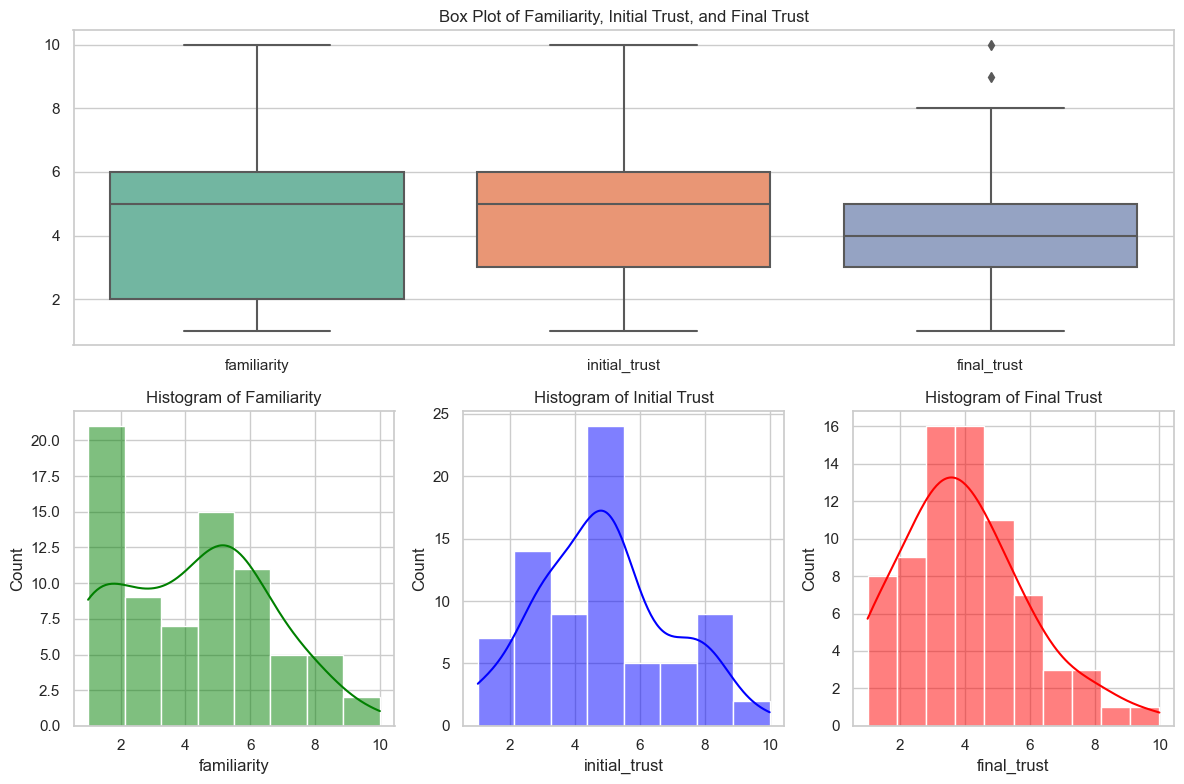

In [246]:
sns.set(style="whitegrid")
data = pp_data[['familiarity', 'initial_trust', 'final_trust']]

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1) 
sns.boxplot(data=data, palette="Set2")
plt.title('Box Plot of Familiarity, Initial Trust, and Final Trust')
plt.subplot(2, 3, 4)  
sns.histplot(data['familiarity'], kde=True, color="green")
plt.title('Histogram of Familiarity')

plt.subplot(2, 3, 5)  
sns.histplot(data['initial_trust'], kde=True, color="blue")
plt.title('Histogram of Initial Trust')

plt.subplot(2, 3, 6) 
sns.histplot(data['final_trust'], kde=True, color="red")
plt.title('Histogram of Final Trust')


plt.tight_layout()

plt.show()


## Simple linear regression analysis to explore relationships between variables familiarity with LLMs and initial trust levels.

In [247]:
import statsmodels.api as sm
X = sm.add_constant(pp_data['familiarity']) 
Y = pp_data['initial_trust']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          initial_trust   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.5310
Date:                Wed, 01 May 2024   Prob (F-statistic):              0.469
Time:                        06:03:29   Log-Likelihood:                -158.31
No. Observations:                  75   AIC:                             320.6
Df Residuals:                      73   BIC:                             325.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.5420      0.487      9.326      

### Response Analysis

From the OLS regression results, we can gather several insights:

1. **R-squared**: The R-squared value is 0.013, which indicates that only about 1.3% of the variation in initial trust levels is explained by the variation in familiarity with LLMs. This suggests that familiarity with LLMs alone does not strongly predict initial trust levels.

2. **Coefficient Estimates**: The coefficient for the variable "familiarity" is 0.0989. This suggests that for every one-unit increase in familiarity with LLMs, initial trust levels increase by approximately 0.0989 units. However, since the coefficient is not statistically significant (p-value = 0.324), we cannot conclude that this relationship is not likely due to random chance.

3. **Intercept**: The intercept (const) is 4.4704. This represents the estimated initial trust level when familiarity with LLMs is zero.

4. **Statistical Significance**: The p-values associated with the coefficient estimates provide information about their statistical significance. In this case, the p-value for the coefficient of "familiarity" is 0.324, which is greater than the typical significance level of 0.05. This suggests that familiarity with LLMs is not a statistically significant predictor of initial trust levels in this model.

5. **Model Fit**: The F-statistic is 0.9850 with a associated probability of 0.324. This suggests that the overall fit of the model is not statistically significant, further indicating that familiarity with LLMs alone may not be a strong predictor of initial trust levels.

6. **Assumptions**: The assumptions of linear regression (e.g., normality of residuals, homoscedasticity) should be assessed to ensure the validity of the model results.

In summary, based on these results, familiarity with LLMs does not appear to be a significant predictor of initial trust levels. Additional factors or a more complex model may be needed to better understand the determinants of initial trust in LLMs.

## Classify Responses and create distribution table 

In [248]:
def preprocess_text(text):
   
    if not isinstance(text, str):
        return []
    
   
    tokens = word_tokenize(text.lower())
    
    
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    return tokens



In [249]:
categories_use_area = {
    'Education': [
        'education','educate', 'lesson', 'learning', 'teaching', 'school', 'university', 'students', 'homework', 'learn', 'essay', 'essays'
        'academic', 'tutors', 'study', 'knowledge', 'search engine', 'answers', 'assignments', 'personalized tutors'
    ],
    'Healthcare': [
        'healthcare', 'health', 'medical', 'medicine', 'diagnosis', 'clinical', 'physicians',
        'patient', 'diagnostics', 'treatment', 'clinical experience'
    ],
    'Entertainment': [
        'entertainment', 'movies', 'films', 'media', 'gaming', 'game', 'video games',
        'acting', 'video', 'music', 'performances', 'creative',  'content', 'generation', 'writing', 'articles', 'news', 'reporting', 'blogs',
        'content creation', 'text generation', 'document creation', 'media creation'
    ],
    'Programming': [
        'programming', 'software', 'coding', 'code', 'developer',
        'debugging', 'programmers', 'technical', 'technology', 'tech', 'coding', 'innovation', 'search engines', 'information technology',
        'data management'
    ],
    'Law': [
        'law', 'legal', 'policy', 'regulations', 'compliance', 'precedent', 'legal research'
    ],
    'Business': [
        'business', 'corporate', 'finance', 'marketing', 'customer service', 'business plan',
        'management', 'strategy', 'operations', 'scheduling', 'business writing'
    ],
    'Research': [
        'research', 'scientific', 'studies', 'data analysis', 'experimentation',
        'science', 'scientific research', 'data gathering', 'analysis', 'material science'
    ],
    'other': []  
}



In [250]:
def classify_response(text, categories):
    processed_text = preprocess_text(text)
    response_categories = []
    for category, keywords in categories.items():
       
        if category == 'other':
            continue
        for keyword in keywords:
            if keyword in processed_text:
                response_categories.append(category)
                break  
                
    if not response_categories:
        response_categories.append('other')
    
    return list(set(response_categories))  

categories_use_area['other'] = []

pp_data['area_classified'] = pp_data['future_area'].apply(lambda x: classify_response(x, categories_use_area))


print(pp_data[['area_classified']].head())

                          area_classified
0                            [Healthcare]
1                                 [other]
2   [Entertainment, Research, Healthcare]
3            [Entertainment, Programming]
4  [Entertainment, Education, Healthcare]


In [251]:
def summarize_categories(column, data):
    category_counts = Counter()
    total_responses = 0 

    for categories in data[column]:
        if categories:  
            category_counts.update(categories)
            total_responses += 1


    category_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Count'])
    
  
    category_df['Percent'] = (category_df['Count'] / total_responses) * 100
    
    return category_df

category_table1 = summarize_categories('area_classified', pp_data)
def style_table(df):
    return df.style\
             .set_properties(**{'text-align': 'left'})\
             .set_table_styles([
                 {'selector': 'th', 'props': [('text-align', 'left')]}, 
                 {'selector': 'tr', 'props': [('background-color', '')]} 
             ])\
             .set_caption("Distribution of Area")

print("Distribution of area:")
styled_table1 = style_table(category_table1)
display(styled_table1)


Distribution of area:


,Category,Count,Percent
0,Healthcare,18,24.000000
1,other,11,14.666667
2,Entertainment,30,40.000000
3,Research,6,8.000000
4,Programming,25,33.333333
5,Education,23,30.666667
6,Business,5,6.666667
7,Law,5,6.666667


                  Category  Frequency
6               healthcare         13
8                education         11
3   arts and entertainment         11
10    software development          9
4               government          6
5               journalism          5
1                  finance          4
11                politics          3
13            social media          2
0                 research          2
21        customer service          2
2                 military          2
16               marketing          2
18            data science          1
22      social engineering          1
20                   media          1
19           cybersecurity          1
12                 banking          1
17           advertisement          1
15               insurance          1
14                   sales          1
9            manufacturing          1
7         criminal justice          1
23                 fashion          1


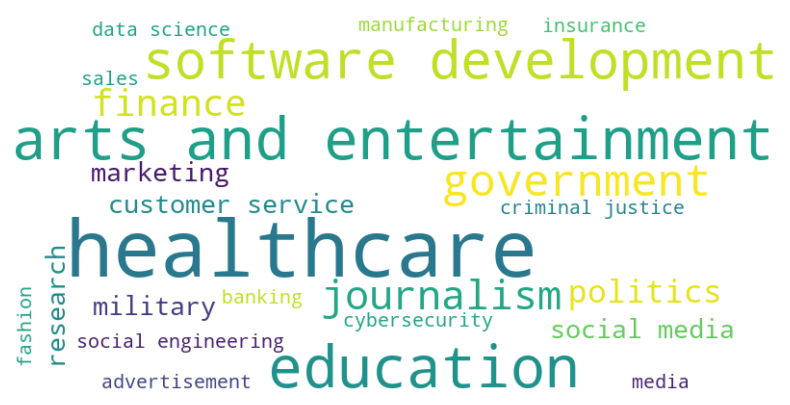

In [252]:
# 'vulnerable_encoding', 'positive_tasks_encoding', 
#     'exploitative_tasks_encoding', 'effects_encoding', 'risks_encoding'
# Splitting comma-separated entries and counting
category_counter = Counter()

def preprocess(text):
    if pd.isna(text) or text.strip() == "":
        return None  
    text = text.strip().lower()
    replacements = {
        'data science': 'data science', 'data sciences': 'data science',
        'customer service': 'customer service', 'customers service': 'customer service',
        'software development': 'software development', 'software dev': 'software development', 'software developmentelopment': 'software development',
        'arts and entertainment': 'arts and entertainment', 'art and entertainment': 'arts and entertainment',
        'healthcare': 'healthcare', 'health care': 'healthcare'
    }
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

category_counter = Counter()
for entry in pp_data['vulnerable_encoding']:
    if pd.notna(entry): 
        categories = entry.split(',')
        categories = [preprocess(cat) for cat in categories if preprocess(cat)]
        category_counter.update(categories)


category_df = pd.DataFrame(category_counter.items(), columns=['Category', 'Frequency'])
category_df = category_df.sort_values(by='Frequency', ascending=False)
print(category_df)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [254]:
import pandas as pd

vulnerable_sectors_class = {
    'Healthcare': ['healthcare'],
    'Education': ['education'],
    'Technology': [
        'software development', 'data science', 'cybersecurity'
    ],
    'Arts and Media': [
        'arts and entertainment', 'journalism', 'media','fashion'
    ],
    'Research': [
        'research'
    ]
    ,
    'Government/Military': [
        'government', 'military', 'politics'
    ],
    'Crime':[
        'criminal justice','social engineering'
    ],
    'Business and Marketing': [
        'marketing', 'customer service', 'finance', 'advertisement', 'sales'
    ],
    'Finance':[
        'banking', 'insurance'
    ]
    ,
    'Other': [
         'manufacturing', 
    ]
}

def map_category_to_main(cat, mapping):
    for main_category, subcats in mapping.items():
        if cat in subcats:
            return main_category
    return 'Other'

category_df['Main Category'] = category_df['Category'].apply(lambda x: map_category_to_main(x, vulnerable_sectors_class))
final_counts = category_df.groupby('Main Category').agg({
    'Frequency': 'sum',
    'Category': lambda x: ', '.join(sorted(set(x)))  # Collect unique subcategories
}).reset_index()

# Calculate total percentages
total_frequency = final_counts['Frequency'].sum()
final_counts['Percent'] = (final_counts['Frequency'] / total_frequency * 100).round(1)

# Print the final categorized DataFrame
print(final_counts)


def style_table(df, name):
    return df.style\
             .set_properties(**{'text-align': 'left'})\
             .set_table_styles([
                 {'selector': 'th', 'props': [('text-align', 'left')]},  # Ensures headers are left-aligned
                 {'selector': 'tr', 'props': [('background-color', '')]}  # Resets any row background color styling
             ])\
             .set_caption("Distribution of" + name)\
             .format({'Percent': "{:.1f}%"})  # Format percent with two decimal places

styled_table = style_table(final_counts, " vulnerable sectors")
display(styled_table)



            Main Category  Frequency  \
0          Arts and Media         18   
1  Business and Marketing         10   
2                   Crime          2   
3               Education         11   
4                 Finance          2   
5     Government/Military         11   
6              Healthcare         13   
7                   Other          3   
8                Research          2   
9              Technology         11   

                                            Category  Percent  
0  arts and entertainment, fashion, journalism, m...     21.7  
1  advertisement, customer service, finance, mark...     12.0  
2               criminal justice, social engineering      2.4  
3                                          education     13.3  
4                                 banking, insurance      2.4  
5                     government, military, politics     13.3  
6                                         healthcare     15.7  
7                        manufacturing, social 

,Main Category,Frequency,Category,Percent
0,Arts and Media,18,"arts and entertainment, fashion, journalism, media",21.7%
1,Business and Marketing,10,"advertisement, customer service, finance, marketing, sales",12.0%
2,Crime,2,"criminal justice, social engineering",2.4%
3,Education,11,education,13.3%
4,Finance,2,"banking, insurance",2.4%
5,Government/Military,11,"government, military, politics",13.3%
6,Healthcare,13,healthcare,15.7%
7,Other,3,"manufacturing, social media",3.6%
8,Research,2,research,2.4%
9,Technology,11,"cybersecurity, data science, software development",13.3%


                           Category  Frequency
3                   generating code         15
15            perform routine tasks          6
1                               all          4
12                   debugging code          4
18               generating scripts          4
..                              ...        ...
32              candidate screening          1
33                   mapping tumors          1
35                   speech writing          1
36                       scheduling          1
67  adaptive programming assistance          1

[68 rows x 2 columns]


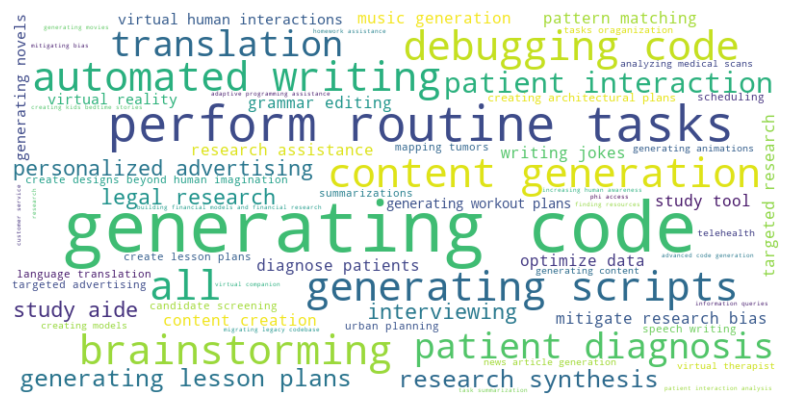

In [255]:
category_counter = Counter()

def preprocess(text):
    if pd.isna(text) or text.strip() == "":
        return None  # Return None to indicate invalid or empty entry
    text = text.strip().lower()
    replacements = {
        'performe routine tasks': 'perform routine tasks',
        'tasks organization': 'task organization',
        'peform routine tasks': 'perform routine tasks',
        'fiancial models': 'financial models',  
        'writing code': 'coding', 'personalized ads': 'personalized advertising', 'personal advertising': 'personalized advertising' 
    }
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

category_counter = Counter()
for entry in pp_data['positive_tasks_encoding']:
    if pd.notna(entry): 
        categories = entry.split(',')
        categories = [preprocess(cat) for cat in categories if preprocess(cat)]
        category_counter.update(categories)

        category_df = pd.DataFrame(category_counter.items(), columns=['Category', 'Frequency'])
category_df = category_df.sort_values(by='Frequency', ascending=False)
print(category_df)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [256]:
tasks_categories = {
    'Healthcare': [
        'patient diagnosis', 'telehealth', 'diagnose patients', 'analyzing medical scans', 'virtual therapist',
        'patient interaction', 'patient interaction analysis', 'medical tasks', 'phi access'
    ],
    'Social':[
        'virtual companion', 'virtual human interactions','social media'
    ],
    'Software development': [
        'debugging code', 'writing code', 'generating code', 'automated writing', 'creating models', 'adaptive programming assistance',
        'code generation', 'migrating legacy codebase', 'coding', 'software tasks', 'advanced code generation'
    ],
    'Research': [
        'research synthesis','information queries', 'finding resources', 'research assistance', 'mapping tumors', 'targeted research', 'research', 'building financial models and financial research'
    ],
    'Education': [
        'create lesson plans', 'homework assistance',
        'study aide', 'teaching', 'educational tasks', 'training tasks'
    ],
    'Legal': [
        'legal research', 'legal tasks', 'compliance tasks'
    ],
    'Marketing and Advertising': [
        'personal advertising', 'targeted advertising', 'personalized ads', 'personalized advertising', 'marketing tasks', 
    ],
    'Government': [
        'city planning', 'Government', 'public governance', 'government tasks'
    ],
    'Automated Tasks': [
        'pattern matching',
        'brainstorming',
        'building financial models and financial research',
        'candidate screening',
        'customer service',
        'summarizations',
        'scheduling',
        'task summarization',
        'tasks organization',
        'perform routine tasks',
        'performing routine tasks',
        'grammar editing'
        
    ],
    'Human Resources Tasks': [
        'candidate screening',
        'interviewing',
        'mitigating bias'
    ],
    'Content Generation': [
        'dance',
        'generating animations',
        'content generation',
        'content creation',
        'music generation',
        'generate movie scripts',
        'creating architectural plans',
        'creative tasks',
        'create designs beyond human imagination',
        'automated writing',
        'writing jokes',
        'writing scripts',
        'news article generation',
        'speech writing',
        'translating',
        'language translation',
        'creating kids bedtime stories',
        'generating lesson plans',
        'generating workout plans',
        'generating content',
        'generating literature',
        'generating movies',
        'generating scripts'
    ]
}


category_df['Main Category'] = category_df['Category'].apply(lambda x: map_category_to_main(x, tasks_categories))

final_counts = category_df.groupby('Main Category').agg({
    'Frequency': 'sum',
    'Category': lambda x: ', '.join(sorted(set(x)))  # Collect unique subcategories
}).reset_index()

total_frequency = final_counts['Frequency'].sum()
final_counts['Percent'] = (final_counts['Frequency'] / total_frequency * 100).round(2)

styled_table = style_table(final_counts, " future llm tasks ")
display(styled_table)



,Main Category,Frequency,Category,Percent
0,Automated Tasks,17,"brainstorming, candidate screening, customer service, grammar editing, pattern matching, perform routine tasks, scheduling, summarizations, task summarization",14.5%
1,Content Generation,23,"content creation, content generation, create designs beyond human imagination, creating architectural plans, creating kids bedtime stories, generating animations, generating content, generating lesson plans, generating movies, generating scripts, generating workout plans, language translation, music generation, news article generation, speech writing, writing jokes",19.7%
2,Education,4,"create lesson plans, homework assistance, study aide",3.4%
3,Healthcare,12,"analyzing medical scans, diagnose patients, patient diagnosis, patient interaction, patient interaction analysis, phi access, telehealth, virtual therapist",10.3%
4,Human Resources Tasks,3,"interviewing, mitigating bias",2.6%
5,Legal,2,legal research,1.7%
6,Marketing and Advertising,3,"personalized advertising, targeted advertising",2.6%
7,Other,15,"all, generating novels, increasing human awareness, mitigate research bias, optimize data, study tool, tasks oraganization, translation, urban planning, virtual reality",12.8%
8,Research,9,"building financial models and financial research, finding resources, information queries, mapping tumors, research, research assistance, research synthesis, targeted research",7.7%
9,Social,2,"virtual companion, virtual human interactions",1.7%


                                  Category  Frequency
7                                 scamming         15
1                               deep fakes         14
15                          misinformation          8
6                            impersonating          8
9                 political disinformation          6
19                      social engineering          5
13                         data harvesting          5
12                                phishing          5
23           generating crime instructions          3
5                               plagiarism          3
8                                  hacking          2
4                                forgeries          2
14                              propaganda          2
3                   copyright infringement          2
18                                spamming          2
28                 spruious authentication          1
22                  generating hate speech          1
26                     artic

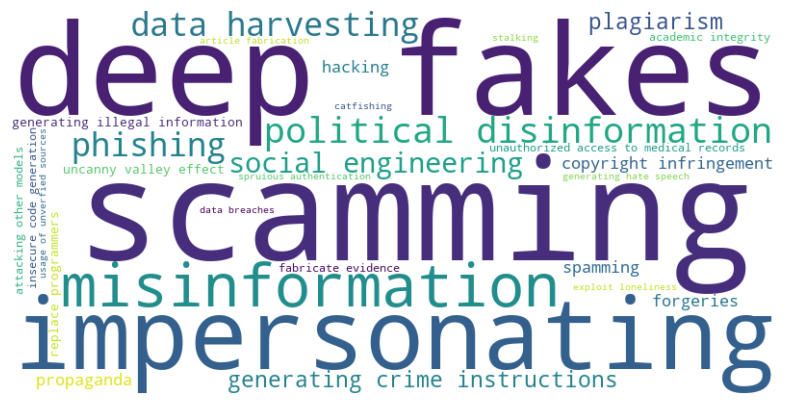

In [257]:
def preprocess(text):
    if pd.isna(text) or text.strip() == "":
        return None  # Return None to indicate invalid or empty entry
    text = text.strip().lower()
    replacements = {
        'deep fakea': 'deep fakes', 'deep fake': 'deep fakes', 'deep fakes': 'deep fakes', 'deep fakess': 'deep fakes', 'creating deep fakes': 'deep fakes',
        'cat fishing': 'catfishing', 'data harversting': 'data harvesting', 'data harverst': 'data harvesting', 'creating propaganda':'propaganda', 'generating propaganda':'propaganda','generate propaganda':'propaganda',
        'physcological manipulation': 'psychological manipulation', 'creatting': 'creating', 'creating': 'creating', 'creating misinformation': 'misinformation',
        'scaming': 'scamming', 'scamming': 'scamming', 'plaigarism': 'plagiarism', 'impersonation': 'impersonating', 'generate': 'generating'
    }
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

category_counter = Counter()
for entry in pp_data['exploitative_tasks_encoding']:
    if pd.notna(entry):  # Only process if entry is not NaN
        categories = entry.split(',')
        categories = [preprocess(cat) for cat in categories if preprocess(cat)]
        category_counter.update(categories)

category_df = pd.DataFrame(category_counter.items(), columns=['Category', 'Frequency'])
category_df = category_df.sort_values(by='Frequency', ascending=False)
print(category_df)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

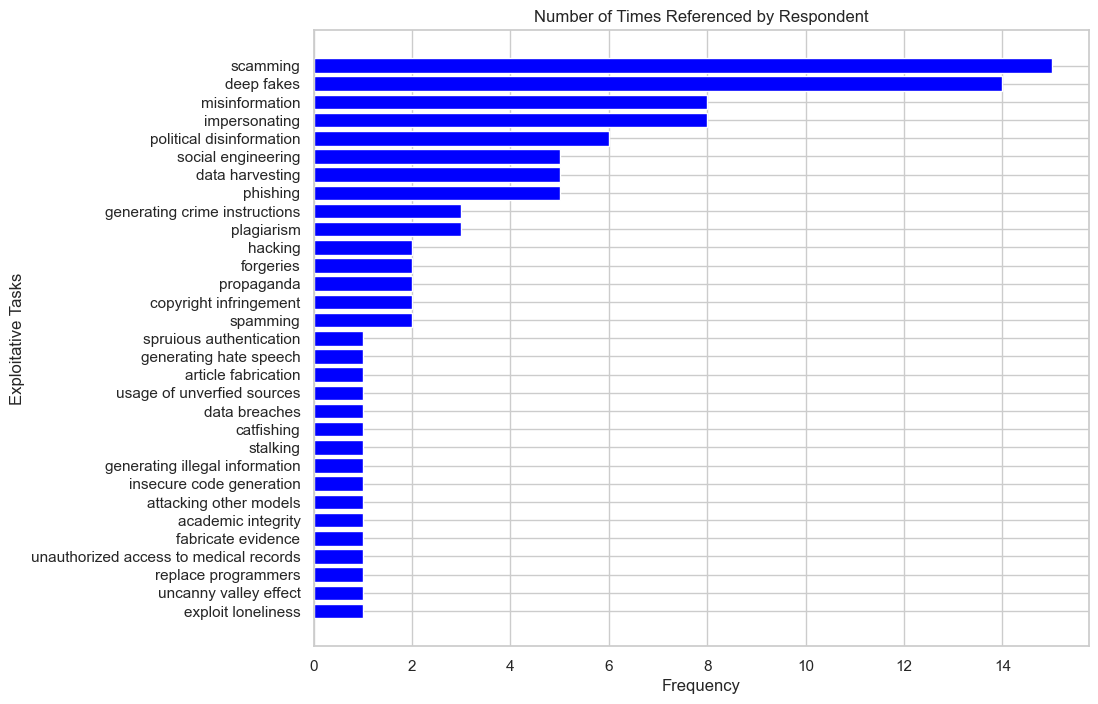

In [258]:
plt.figure(figsize=(10, 8))
plt.barh(category_df['Category'],category_df['Frequency'], color='blue')
plt.xlabel('Frequency')
plt.ylabel('Exploitative Tasks')
plt.title('Number of Times Referenced by Respondent')
plt.gca().invert_yaxis()  
plt.show()


In [259]:
trust_by_field = pp_data.groupby('field_of_study')['initial_trust'].mean()

trust_by_field_df = trust_by_field.reset_index()

trust_by_field_df = trust_by_field_df.sort_values(by='initial_trust', ascending=False)

print(trust_by_field_df)


                field_of_study  initial_trust
1                     business       5.571429
5  legal (practicing attorney)       5.000000
0             arts and science       4.951220
4                  engineering       4.882353
3             computer science       4.250000
6                      nursing       4.000000
7                   psychology       4.000000
2                    chemistry       1.000000


In [260]:
trust_and_count_by_field = pp_data.groupby('field_of_study')['initial_trust'].agg(['mean', 'count'])
trust_and_count_by_field.rename(columns={'mean': 'Mean Initial Trust', 'count': 'Count of Participants'}, inplace=True)
trust_and_count_by_field = trust_and_count_by_field.reset_index()
trust_and_count_by_field = trust_and_count_by_field.sort_values(by='Mean Initial Trust', ascending=False)
print(trust_and_count_by_field)



                field_of_study  Mean Initial Trust  Count of Participants
1                     business            5.571429                      7
5  legal (practicing attorney)            5.000000                      1
0             arts and science            4.951220                     41
4                  engineering            4.882353                     17
3             computer science            4.250000                      4
6                      nursing            4.000000                      2
7                   psychology            4.000000                      2
2                    chemistry            1.000000                      1


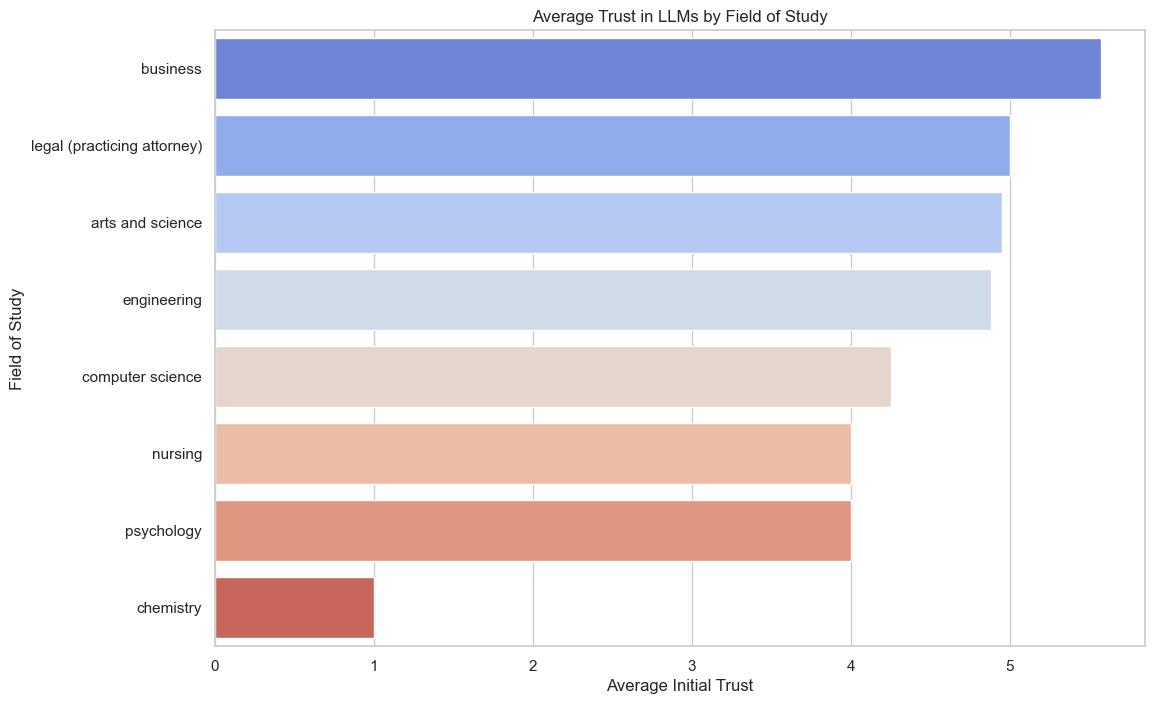

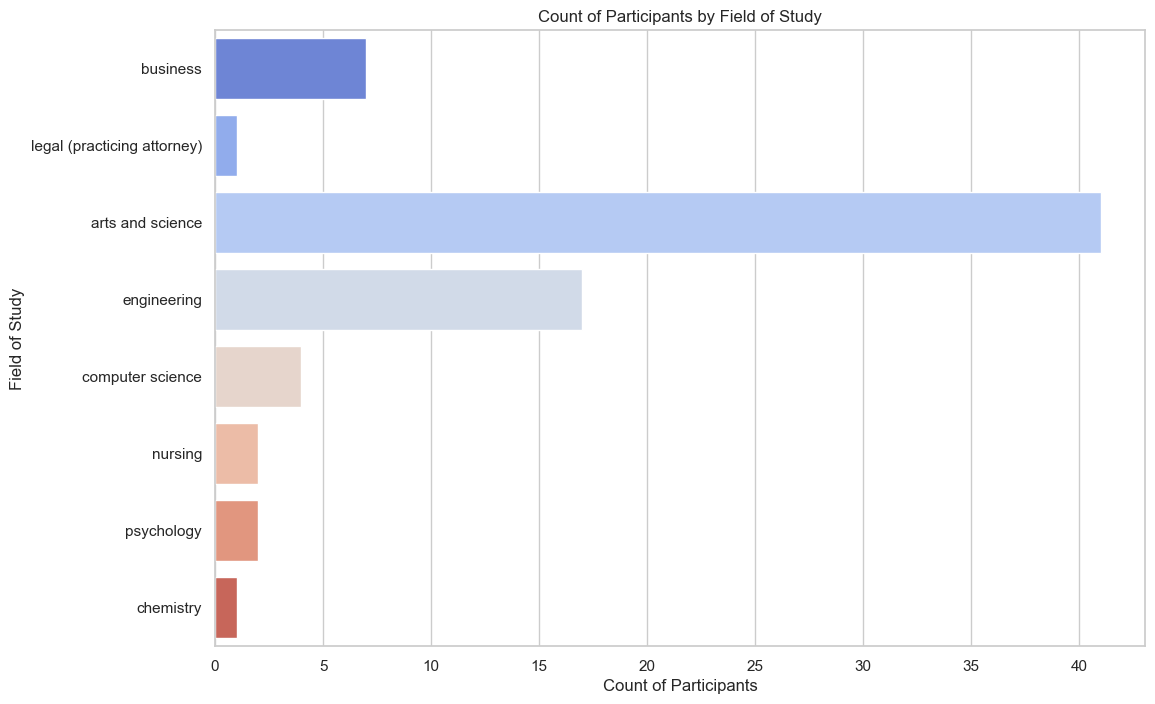

In [261]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Mean Initial Trust', y='field_of_study', data=trust_and_count_by_field, palette="coolwarm")
plt.title('Average Trust in LLMs by Field of Study')
plt.xlabel('Average Initial Trust')
plt.ylabel('Field of Study')

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Count of Participants', y='field_of_study', data=trust_and_count_by_field, palette="coolwarm")
plt.title('Count of Participants by Field of Study')
plt.xlabel('Count of Participants')
plt.ylabel('Field of Study')

plt.show()


In [262]:
trust_and_count_by_field2 = pp_data.groupby('field_of_study')['final_trust'].agg(['mean', 'count'])
trust_and_count_by_field2.rename(columns={'mean': 'Mean final Trust', 'count': 'Count of Participants'}, inplace=True)

trust_and_count_by_field2 = trust_and_count_by_field2.reset_index()

trust_and_count_by_field2 = trust_and_count_by_field2.sort_values(by='Mean final Trust', ascending=False)
print(trust_and_count_by_field2)

                field_of_study  Mean final Trust  Count of Participants
1                     business          5.000000                      7
5  legal (practicing attorney)          5.000000                      1
0             arts and science          4.121951                     41
4                  engineering          3.941176                     17
3             computer science          3.250000                      4
7                   psychology          3.000000                      2
6                      nursing          1.500000                      2
2                    chemistry          1.000000                      1


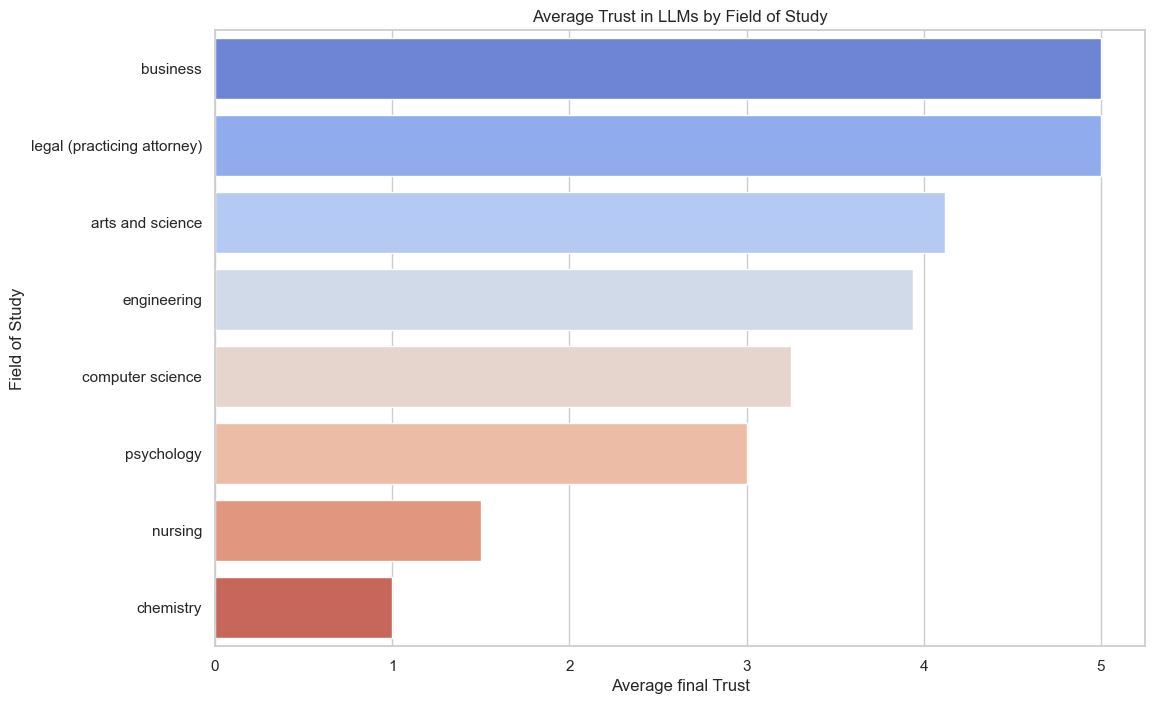

In [263]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Mean final Trust', y='field_of_study', data=trust_and_count_by_field2, palette="coolwarm")
plt.title('Average Trust in LLMs by Field of Study')
plt.xlabel('Average final Trust')
plt.ylabel('Field of Study')

plt.show()

In [264]:
average_trust = pp_data['initial_trust'].mean()

print("Average Intial Trust:", average_trust)
average_trust = pp_data['final_trust'].mean()

print("Average Final Trust:", average_trust)

Average Intial Trust: 4.8533333333333335
Average Final Trust: 3.986666666666667


                                             Category  Frequency
13                                     misinformation         10
6                                    privacy breaches          9
12                                    data harvesting          7
9                     usage of unverified information          6
10                       decrease in human creativity          3
26                                     data poisoning          3
33                                         deep fakes          3
21                           insecure code generation          3
23                            impersonation and scams          2
17                                  selling user data          2
14                         overreliance on technology          2
7                   patient health information leaked          2
3                                    hipaa violations          2
41                                           spamming          1
44                       

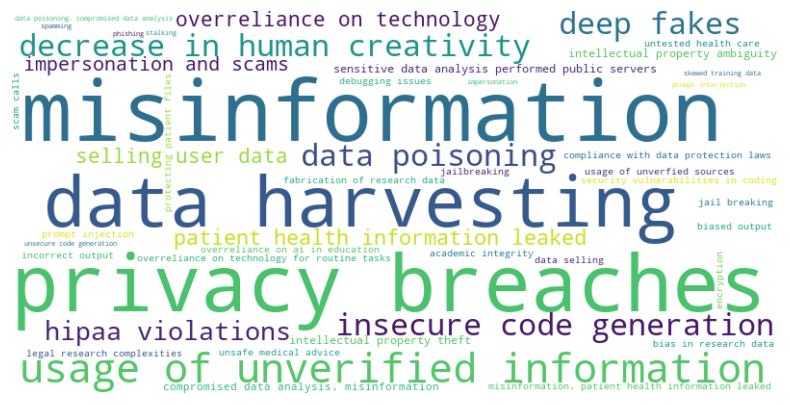

,Main Category,Frequency,Category,Percent
0,Data security and privacy,41,"compliance with data protection laws, data harvesting, deep fakes, encryption, intellectual property ambiguity, intellectual property theft, misinformation, privacy breaches, selling user data, usage of unverified information",46.6%
1,Education and research,9,"academic integrity, bias in research data, decrease in human creativity, fabrication of research data, overreliance on ai in education, overreliance on technology",10.2%
2,Healthcare,7,"hipaa violations, patient health information leaked, protecting patient files, unsafe medical advice, untested health care",8.0%
3,Legal and compliance issues,3,"impersonation and scams, legal research complexities",3.4%
4,Other,16,"biased output, compromised data analysis. misinformation, data poisoning. compromised data analysis, data selling, impersonation, incorrect output, jail breaking, misinformation. patient health information leaked, overreliance on technology for routine tasks, phishing, prompt interjection, scam calls, sensitive data analysis performed public servers, spamming, stalking, usage of unverfied sources",18.2%
5,Programming,12,"data poisoning, debugging issues, insecure code generation, jailbreaking, prompt injection, security vulnerabilities in coding, skewed training data, unsecure code generation",13.6%


In [265]:
category_counter = Counter()

def preprocess(text):
    if pd.isna(text) or text.strip() == "":
        return None 
    text = text.strip().lower()
    replacements = { 'patien health information leaked':'patient health information leaked'
    }
    for key, value in replacements.items():
        text = text.replace(key, value)
    return text

category_counter = Counter()
for entry in pp_data['increase_reliance']:
    if pd.notna(entry): 
        categories = entry.split(',')
        categories = [preprocess(cat) for cat in categories if preprocess(cat)]
        category_counter.update(categories)
category_df = pd.DataFrame(category_counter.items(), columns=['Category', 'Frequency'])
category_df = category_df.sort_values(by='Frequency', ascending=False)
print(category_df)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counter)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

increased_reliance_encoding = {
    'Data security and privacy': [
        'sensitive data analysis performed on public servers',
        'intellectual property ambiguity',
        'intellectual property theft',
        'privacy breaches',
        'compliance with data protection laws',
        'misinformation',
        'usage of unverified information',
        'usage of unverified sources',
        'data harvesting',
        'selling user data',
        'encryption',
        'deep fakes'
    ],
    'Healthcare': [
        'hipaa violations',
        'patient health information leaked',
        'untested health care',
        'unsafe medical advice',
        'protecting patient files'
    ],
    'Programming': [
        'security vulnerabilities in coding',
        'insecure code generation',
        'unsecure code generation',
        'debugging issues',
        'jailbreaking',
        'data poisoning',
        'prompt injection',
        'skewed training data'
    ],
    'Legal and compliance issues': [
        'privacy breaches',
        'legal research complexities',
        'impersonation and scams'
    ],
    'Education and research': [
        'academic integrity',
        'bias in research data',
        'overreliance on ai in education',
        'overreliance on technology',
        'fabrication of research data',
        'decrease in human creativity'
    ],
    'Other': [
        'misinformation',
        'false information',
        'impersonation and scams',
        'phishing',
        'spamming',
        'stalking',
        'overreliance on technology for routine tasks',
        'incorrect output',
        'prompt interjection' 
    ]
}

category_df['Main Category'] = category_df['Category'].apply(lambda x: map_category_to_main(x, increased_reliance_encoding))

final_counts = category_df.groupby('Main Category').agg({
    'Frequency': 'sum',
    'Category': lambda x: ', '.join(sorted(set(x))) 
}).reset_index()


total_frequency = final_counts['Frequency'].sum()
final_counts['Percent'] = (final_counts['Frequency'] / total_frequency * 100).round(2)



styled_table = style_table(final_counts, " future llm tasks ")
display(styled_table)


In [266]:
privacy_security_solutions = {
    'data breach': {
        'issues': [
            'data breach', 'hacking llm data stores', 'prompted injection', 'jailbreaking to reveal proprietary data'
        ],
        'solutions': [
            'encryption for data sent between llms',
            'implement robust llm security measures',
            'anonymized sensitive data storage',
            'localize llm usage'
        ]
    },
    'consent issues': {
        'issues': [
            'data sale', 'data harvesting', 'model retraining using user data','selling data to brokers', 'generation of user profile based on chat history'
        ],
        'solutions': [
            'regulations for optimizing models using user input',
            'legislation',
            'delete sensitive history'
        ]
    },
    'data handling issues': {
        'issues': [
            'unsecure data transmission', 'data leakage'
        ],
        'solutions': [
            'encryption for data sent between llms',
            'implement no cache policy'
        ]
    },
    'invasions of privacy': {
        'issues': [
            'subpoena of user history', 'identity theft', 'chat history leakage', 'data leakage', 'leveraging llms to generate password combinations', 'exploitation of present visual and audio identity verification mehtods'
        ],
        'solutions': [
            'identity verification before registration',
            'warn users of the risks of inputting sensitive information',
            'restrict llms to non-sensitive tasks',
            'training on pii or being given access to pii for augmentation',
            'training users on llms to ensure safe interactions'
        ]
    },
    'Other': {
        'issues': ['corporate espionage'],
        'solutions': [
            'restrict llm usage for companies handling sensitive information'
        ]
    }
}


          Main Category                                           Category  \
0                 Other  corporate espionage, data leekage, data storag...   
1        consent issues  data harvesting, data sale, generation of user...   
2           data breach  data breach, hacking llm data stores, jailbrea...   
3  invasions of privacy  chat history leakage, exploitation of present ...   

                                           Solutions  
0  restrict llm usage for companies handling sens...  
1  regulations for optimizing models using user i...  
2  encryption for data sent between llms, impleme...  
3  identity verification before registration, war...  


,Main Category,Category,Solutions
0,Other,"corporate espionage, data leekage, data storage, leveragig llm's to generating password combination, unsecure data trnsmission",restrict llm usage for companies handling sensitive information
1,consent issues,"data harvesting, data sale, generation of user profile based on chat history, model retraining using user data, selling data to brokers","regulations for optimizing models using user input, legislation, delete sensitive history"
2,data breach,"data breach, hacking llm data stores, jailbreaking to reveal proprietary data, prompted injection","encryption for data sent between llms, implement robust llm security measures, anonymized sensitive data storage, localize llm usage"
3,invasions of privacy,"chat history leakage, exploitation of present visual and audio identity verification mehtods, identity theft, leveraging llms to generate password combinations, subpoena of user history","identity verification before registration, warn users of the risks of inputting sensitive information, restrict llms to non-sensitive tasks, training on pii or being given access to pii for augmentation, training users on llms to ensure safe interactions"


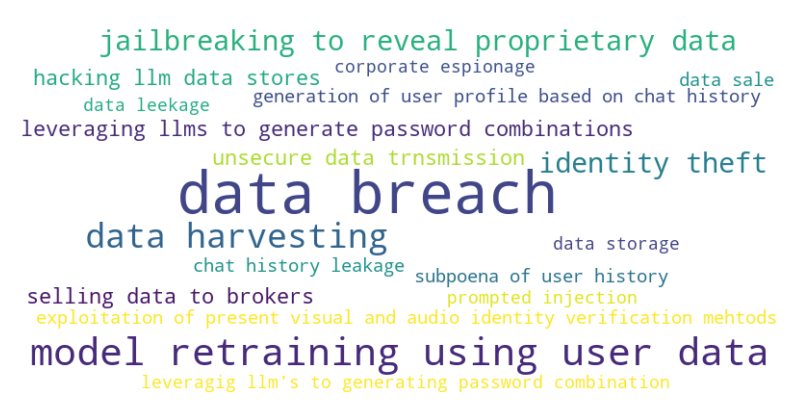

In [267]:

# Function to map each category to its corresponding main category
def map_category_to_main(category, mapping_dict):
    for main_category, content in mapping_dict.items():
        if category in content['issues']:
            return main_category
    return 'Other'


category_counter = Counter()

for entry in pp_data['issue_encoding']:
    if pd.notna(entry):
        categories = entry.split(',')
        categories = [preprocess(cat) for cat in categories if preprocess(cat)]
        category_counter.update(categories)

category_df = pd.DataFrame(category_counter.items(), columns=['Category', 'Frequency'])
category_df = category_df.sort_values(by='Frequency', ascending=False)

category_df['Main Category'] = category_df['Category'].apply(lambda x: map_category_to_main(x, privacy_security_solutions))
category_df['Solutions'] = category_df['Category'].apply(lambda x: ', '.join(privacy_security_solutions.get(map_category_to_main(x, privacy_security_solutions), {'solutions': []})['solutions']))


final_counts = category_df.groupby('Main Category').agg({
    'Category': lambda x: ', '.join(sorted(set(x))),
    'Solutions': lambda x: ', '.join(sorted(set(x)))
}).reset_index()


print(final_counts)

styled_table = style_table(final_counts, " future llm tasks ")
display(styled_table)


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(category_counter)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [271]:
LLM_risks_encoding = {
    
        'loss of insightful motivation in math',
        'results becoming unmotivated and decontextualized',
        'decrease in the quality of academic research',
        'reduced natural human creativity',
        'overreliance on technology diminishing human skills'
    ],
    'Legal and Compliance': [
        'impersonation and scams',
        'privacy breaches',
        'compliance with data protection laws',
        'legal research complexities',
        'disservice to the development of young lawyers',
        'job displacement of support staff'
    ],
    'Medicine and Healthcare': [
        'false or wrong diagnosis',
        'flooding journals with fake articles',
        'overuse of AI disrupting patient-doctor relationship',
        'medical data exploitation',
        'biased medical diagnostics harming minority groups'
    ],
    'Programming and Technology': [
        'proprietary data being stolen',
        'unsecure data transmission',
        'exploitation of visual and audio identity verification methods',
        'automated vulnerability testing used for hacking',
        'data poisoning',
        'prompt injection',
        'data leakage'
    ],
    'Business and Employment': [
        'technological unemployment',
        'loss of jobs due to AI substitution',
        'decrease in strategic and creative business decisions',
        'overreliance on AI leading to less competent employees'
    ],
    'Data Security and Privacy': [
        'data breaches',
        'selling user data',
        'unconsented data collection',
        'risk of identity theft',
        'encryption issues',
        'misinformation and false information'
    ],
    'Social and Ethical Concerns': [
        'loss of human interaction',
        'dependency on LLMs leading to social and cognitive decline',
        'loss of critical reasoning skills',
        'generation of fake or biased content',
        'potential misuse of AI for malicious purposes'
    ]
}



SyntaxError: closing parenthesis ']' does not match opening parenthesis '{' on line 1 (2999860066.py, line 8)

In [269]:
risks = [
    # Risks from 'LLM_risks_encoding'
    'loss of insightful motivation in math',
    'results becoming unmotivated and decontextualized',
    'decrease in the quality of academic research',
    'reduced natural human creativity',
    'overreliance on technology diminishing human skills',
    'impersonation and scams',
    'privacy breaches',
    'compliance with data protection laws',
    'legal research complexities',
    'disservice to the development of young lawyers',
    'job displacement of support staff',
    'false or wrong diagnosis',
    'flooding journals with fake articles',
    'overuse of AI disrupting patient-doctor relationship',
    'medical data exploitation',
    'biased medical diagnostics harming minority groups',
    'proprietary data being stolen',
    'unsecure data transmission',
    'exploitation of visual and audio identity verification methods',
    'automated vulnerability testing used for hacking',
    'data poisoning',
    'prompt injection',
    'data leakage',
    'technological unemployment',
    'loss of jobs due to AI substitution',
    'decrease in strategic and creative business decisions',
    'overreliance on AI leading to less competent employees',
    'data breaches',
    'selling user data',
    'unconsented data collection',
    'risk of identity theft',
    'encryption issues',
    'misinformation and false information',
    'loss of human interaction',
    'dependency on LLMs leading to social and cognitive decline',
    'loss of critical reasoning skills',
    'generation of fake or biased content',
    'potential misuse of AI for malicious purposes',

    # Risks from 'increased_reliance_encoding'
    'sensitive data analysis performed on public servers',
    'intellectual property ambiguity',
    'intellectual property theft',
    'usage of unverified information',
    'usage of unverified sources',
    'data harvesting',
    'deep fakes',
    'hipaa violations',
    'patient health information leaked',
    'untested health care',
    'unsafe medical advice',
    'protecting patient files',
    'security vulnerabilities in coding',
    'insecure code generation',
    'debugging issues',
    'jailbreaking',
    'skewed training data',
    'phishing',
    'spamming',
    'stalking',
    'overreliance on technology for routine tasks',
    'incorrect output',

    # Risks extracted from 'privacy_security_solutions' issues
    'hacking llm data stores',
    'jailbreaking to reveal proprietary data',  # Included above as jailbreaking
    'model retraining using user data',
    'generation of user profile based on chat history',
    'subpoena of user history',
    'chat history leakage',
    'leveraging LLMs to generate password combinations',
    'corporate espionage',
]

risks_by_category = {
    'Individual': [
        'false or wrong medical diagnosis',
        'identity theft',
        'unconsented data collection',
        'deep fakes',
        'overuse of AI disrupting patient-doctor relationship',
        'model retraining using user data',
        'generation of user profile based on chat history',
        'leveraging llms to generate password combinations',
        'subpoena of user history',
        'biased medical diagnostics harming minority groups',
        'intellectual property theft',
        'phishing',
        'misinformation',
        'spamming',
        'stalking',
        'incorrect model output',
        'exploitation of visual and audio identity verification methods',
    ],
    'Society': [
        'loss of human interaction',
        'dependency on LLMs leading to social and cognitive decline',
        'loss of human critical reasoning skills',
        'results becoming unmotivated and decontextualized',
        'flooding journals with fake articles',
        'generation of fake or biased content',
        'misinformation',
        'loss of human interaction',
        'biased medical diagnostics harming minority groups',
        'impersonation and scams',
    ],
    'Industry': [
        'data breaches',
        'corporate espionage',
        'insecure data transmission',
        'selling user data',
        'loss of jobs due to AI substitution',
        'decrease in strategic and creative business decisions',
        'overreliance on AI leading to less competent employees',
        'proprietary data being stolen',
        'automated vulnerability testing used for hacking',
        'data poisoning',
        'prompt injection',
        'data leakage',
        'security vulnerabilities in coding',
        'insecure code generation',
        'debugging issues',
        'jailbreaking',
        'skewed training data',
        'legal research complexities',
        'disservice to the development of young lawyers',
        'job displacement of support staff',
        'data harvesting',
        'selling user data',
        'hipaa violations',
        'patient health information leaked',
        'untested health care',
        'unsafe medical advice',
        'overreliance on technology for routine tasks',
    ]
}

table = pd.DataFrame.from_dict(risks_by_category, orient='index').transpose()
print(table.to_string(index=False))


                                                    Individual                                                    Society                                               Industry
                              false or wrong medical diagnosis                                  loss of human interaction                                          data breaches
                                                identity theft dependency on LLMs leading to social and cognitive decline                                    corporate espionage
                                   unconsented data collection                    loss of human critical reasoning skills                             insecure data transmission
                                                    deep fakes          results becoming unmotivated and decontextualized                                      selling user data
          overuse of AI disrupting patient-doctor relationship                       flooding journals with fake ar

In [270]:
# Convert the dictionary into a DataFrame with categories as headers
data = [{'Category': category, 'Risks': ', '.join(risks)} for category, risks in risks_by_category.items()]
df = pd.DataFrame(data)

# Apply custom styling
styled_df = df.style.set_table_styles(
    [{'selector': 'th', 'props': [('background-color', '#D3D3D3')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
).hide(axis='index')

styled_df

Category,Risks
Individual,"false or wrong medical diagnosis, identity theft, unconsented data collection, deep fakes, overuse of AI disrupting patient-doctor relationship, model retraining using user data, generation of user profile based on chat history, leveraging llms to generate password combinations, subpoena of user history, biased medical diagnostics harming minority groups, intellectual property theft, phishing, misinformation, spamming, stalking, incorrect model output, exploitation of visual and audio identity verification methods"
Society,"loss of human interaction, dependency on LLMs leading to social and cognitive decline, loss of human critical reasoning skills, results becoming unmotivated and decontextualized, flooding journals with fake articles, generation of fake or biased content, misinformation, loss of human interaction, biased medical diagnostics harming minority groups, impersonation and scams"
Industry,"data breaches, corporate espionage, insecure data transmission, selling user data, loss of jobs due to AI substitution, decrease in strategic and creative business decisions, overreliance on AI leading to less competent employees, proprietary data being stolen, automated vulnerability testing used for hacking, data poisoning, prompt injection, data leakage, security vulnerabilities in coding, insecure code generation, debugging issues, jailbreaking, skewed training data, legal research complexities, disservice to the development of young lawyers, job displacement of support staff, data harvesting, selling user data, hipaa violations, patient health information leaked, untested health care, unsafe medical advice, overreliance on technology for routine tasks"
